In [1]:
import os
import random
import shutil
import pandas as pd
import json
import pickle
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,  CategoricalNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
clf = pickle.load(open('finalized_model.sav', 'rb'))

In [3]:
def path_decoders_processing(line):
    fname = line[:line.find(':')]
    rest_dict = line[line.find(':')+1:]
    rest_dict = rest_dict[2:-1]
    print(fname)
    #print(len(rest_dict))
    if len(rest_dict) != 0:
        PATH_DECODERS[fname] = {}
        #print(rest_dict)
        rest_lines = rest_dict.split(', "')
        for l in rest_lines:
            path = l[:l.find(':')]
            path = path[:-1]
            #path = path[path.find('"')+1:path.rfind('"')]
            decoders = l[l.find(':')+1:]
            real_decoder = decoders[decoders.rfind(',')+1:]
            real_decoder = real_decoder[2:-2]
            decoders = decoders[:decoders.rfind(',')]
            decoders = decoders[2:]
            decoders = decoders[1:-1]

            decoders = decoders.split('], ')
            #print(path)
            decoder_stats = {}
            for decoder in decoders:
                dname = decoder[1:decoder.find(':')-1]
                result = decoder[decoder.find(':'):]
                result = int(result[result.find('[')+1:result.find('[')+2])
                decoder_stats[dname] = result
                #print(dname, result)
            #print(decoders)
            PATH_DECODERS[fname][path] = decoder_stats, real_decoder
            #print(real_decoder)
            #print()

In [4]:
ABSPATH = os.path.abspath('.')
fnames = []

In [5]:
for path, folder, files in os.walk(ABSPATH):
        if 'stats' in path:
            for (i, fname) in tqdm(enumerate(files)):
                print(path+'/'+fname)
                fnames.append(path+'/'+fname)
                

17it [00:00, 2742.54it/s]

/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/aws_stats_path_decoders.txt
/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/skyscanner_json_json_stats_path_decoders.txt
/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/graphql_stakeshare_stats_path_decoders.txt
/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/railware_base64_stats_path_decoders.txt
/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/perekrestok_base64_stats_path_decoders.txt
/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/perekrestok_json_in_url_stats_path_decoders.txt
/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/beru_json_json_stats_path_decoders.txt
/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/beru_stats_path_decoders.txt
/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/ozon_json_json_stats_path_decoders.txt
/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/graphql_nytimes_stats_path

In [54]:
fnames

['/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/aws_stats_path_decoders.txt',
 '/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/skyscanner_json_json_stats_path_decoders.txt',
 '/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/graphql_stakeshare_stats_path_decoders.txt',
 '/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/railware_base64_stats_path_decoders.txt',
 '/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/perekrestok_base64_stats_path_decoders.txt',
 '/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/perekrestok_json_in_url_stats_path_decoders.txt',
 '/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/beru_json_json_stats_path_decoders.txt',
 '/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/beru_stats_path_decoders.txt',
 '/home/anna/Documents/7 semester/Thesis/decoder-detector/stats/ozon_json_json_stats_path_decoders.txt',
 '/home/anna/Documents/7 semester/Thesis/decoder-det

In [55]:
filename = fnames[16]

In [56]:
with open(filename, 'r') as f:
    path_decoders = f.read().splitlines()
    
PATH_DECODERS = {}
PATH_DECODERS_DICT = []
for i,line in enumerate(path_decoders):
    print(i)
    path_decoders_processing(line)
    
for key in PATH_DECODERS.keys():
    for path in PATH_DECODERS[key].keys():
        current_dict = {}
        current_dict['File'] = key
        current_dict['Path'] = path
        current_dict['Real_decoder'] = PATH_DECODERS[key][path][1]
        dec_stats = PATH_DECODERS[key][path][0]
        for decoder in dec_stats.keys():
            current_dict[decoder] = dec_stats[decoder]
        PATH_DECODERS_DICT.append(current_dict)

0
/waf/decoder-detector/new_samples/youtube/train/parsed/55.json
1
/waf/decoder-detector/new_samples/youtube/train/parsed/194.json
2
/waf/decoder-detector/new_samples/youtube/train/parsed/21.json
3
/waf/decoder-detector/new_samples/youtube/train/parsed/199.json
4
/waf/decoder-detector/new_samples/youtube/train/parsed/151.json
5
/waf/decoder-detector/new_samples/youtube/test/parsed/254.json
6
/waf/decoder-detector/new_samples/youtube/train/parsed/149.json
7
/waf/decoder-detector/new_samples/youtube/train/parsed/94.json
8
/waf/decoder-detector/new_samples/youtube/test/parsed/294.json
9
/waf/decoder-detector/new_samples/youtube/test/parsed/268.json
10
/waf/decoder-detector/new_samples/youtube/test/parsed/341.json
11
/waf/decoder-detector/new_samples/youtube/train/parsed/174.json
12
/waf/decoder-detector/new_samples/youtube/train/parsed/133.json
13
/waf/decoder-detector/new_samples/youtube/train/parsed/188.json
14
/waf/decoder-detector/new_samples/youtube/train/parsed/16.json
15
/waf/decod

138
/waf/decoder-detector/new_samples/youtube/test/parsed/299.json
139
/waf/decoder-detector/new_samples/youtube/train/parsed/237.json
140
/waf/decoder-detector/new_samples/youtube/train/parsed/118.json
141
/waf/decoder-detector/new_samples/youtube/train/parsed/106.json
142
/waf/decoder-detector/new_samples/youtube/train/parsed/205.json
143
/waf/decoder-detector/new_samples/youtube/test/parsed/263.json
144
/waf/decoder-detector/new_samples/youtube/train/parsed/97.json
145
/waf/decoder-detector/new_samples/youtube/train/parsed/72.json
146
/waf/decoder-detector/new_samples/youtube/train/parsed/193.json
147
/waf/decoder-detector/new_samples/youtube/train/parsed/52.json
148
/waf/decoder-detector/new_samples/youtube/train/parsed/169.json
149
/waf/decoder-detector/new_samples/youtube/train/parsed/53.json
150
/waf/decoder-detector/new_samples/youtube/train/parsed/219.json
151
/waf/decoder-detector/new_samples/youtube/test/parsed/279.json
152
/waf/decoder-detector/new_samples/youtube/train/par

274
/waf/decoder-detector/new_samples/youtube/train/parsed/187.json
275
/waf/decoder-detector/new_samples/youtube/train/parsed/115.json
276
/waf/decoder-detector/new_samples/youtube/test/parsed/310.json
277
/waf/decoder-detector/new_samples/youtube/train/parsed/30.json
278
/waf/decoder-detector/new_samples/youtube/train/parsed/46.json
279
/waf/decoder-detector/new_samples/youtube/train/parsed/107.json
280
/waf/decoder-detector/new_samples/youtube/train/parsed/19.json
281
/waf/decoder-detector/new_samples/youtube/train/parsed/95.json
282
/waf/decoder-detector/new_samples/youtube/train/parsed/164.json
283
/waf/decoder-detector/new_samples/youtube/test/parsed/281.json
284
/waf/decoder-detector/new_samples/youtube/train/parsed/156.json
285
/waf/decoder-detector/new_samples/youtube/test/parsed/337.json
286
/waf/decoder-detector/new_samples/youtube/train/parsed/75.json
287
/waf/decoder-detector/new_samples/youtube/train/parsed/28.json
288
/waf/decoder-detector/new_samples/youtube/test/parsed

In [57]:
PATH_DECODERS_DICT

[{'File': '/waf/decoder-detector/new_samples/youtube/train/parsed/55.json',
  'Path': "['headers', 'sec-fetch-site']",
  'Real_decoder': 'None',
  'Base64DetectorDecoder': 0,
  'JsonRPCDetectorParser': 0,
  'CSVDetectorParser': 1,
  'XMLDetectorParser': 0,
  'JSONPDetectorParser': 0,
  'Base32DetectorDecoder': 0,
  'YAMLDetectorParser': 1,
  'GraphQLDetectorParser': 0,
  'JSONDetectorParser': 0,
  'DeflateUnpacker': 0,
  'FormUrlencodeParser': 1,
  'GzipUnpacker': 0,
  'UrlParser': 1,
  'DSVDetectorParser': 1,
  'Base16DetectorDecoder': 0},
 {'File': '/waf/decoder-detector/new_samples/youtube/train/parsed/55.json',
  'Path': "['headers', 'x-youtube-client-version']",
  'Real_decoder': 'None',
  'Base64DetectorDecoder': 0,
  'JsonRPCDetectorParser': 0,
  'CSVDetectorParser': 1,
  'XMLDetectorParser': 0,
  'JSONPDetectorParser': 0,
  'Base32DetectorDecoder': 0,
  'YAMLDetectorParser': 1,
  'GraphQLDetectorParser': 0,
  'JSONDetectorParser': 0,
  'DeflateUnpacker': 0,
  'FormUrlencodePars

In [58]:
app_table = pd.DataFrame(PATH_DECODERS_DICT)
app_table

,'],Base16DetectorDecoder,Base32DetectorDecoder,Base64DetectorDecoder,CSVDetectorParser,DSVDetectorParser,DeflateUnpacker,File,FormUrlencodeParser,GraphQLDetectorParser,...,JSONPDetectorParser,JsonRPCDetectorParser,Path,Real_decoder,UrlParser,XMLDetectorParser,YAMLDetectorParser,me'],od'],ority']
0,NaN,0,0,0.0,1,1,0,/waf/decoder-detector/new_samples/youtube/trai...,1,0,...,0,0,"['headers', 'sec-fetch-site']",None,1,0,1,NaN,NaN,NaN
1,NaN,0,0,0.0,1,1,0,/waf/decoder-detector/new_samples/youtube/trai...,1,0,...,0,0,"['headers', 'x-youtube-client-version']",None,1,0,1,NaN,NaN,NaN
2,NaN,0,1,0.0,1,1,0,/waf/decoder-detector/new_samples/youtube/trai...,1,0,...,0,0,"['body', 'context', 'client', 'hl']",None,1,0,1,NaN,NaN,NaN
3,NaN,0,0,1.0,1,1,0,/waf/decoder-detector/new_samples/youtube/trai...,1,0,...,0,0,"['headers', 'x-goog-visitor-id']",None,1,0,1,NaN,NaN,NaN
4,NaN,0,1,NaN,1,1,0,/waf/decoder-detector/new_samples/youtube/trai...,1,0,...,0,0,"['headers',",None,1,0,1,NaN,0.0,NaN
5,NaN,1,0,0.0,1,1,0,/waf/decoder-detector/new_samples/youtube/trai...,1,0,...,0,0,"['body', 'events', '0', 'context', 'lastActivi...",None,1,0,1,NaN,NaN,NaN
6,NaN,0,0,0.0,1,1,0,/waf/decoder-detector/new_samples/youtube/trai...,1,0,...,0,0,"['headers', 'x-youtube-utc-offset']",None,1,0,1,NaN,NaN,NaN
7,NaN,0,0,0.0,1,1,0,/waf/decoder-detector/new_samples/youtube/trai...,1,0,...,0,0,"['headers', 'x-youtube-device']",None,1,0,1,NaN,NaN,NaN
8,NaN,0,1,0.0,1,1,0,/waf/decoder-detector/new_samples/youtube/trai...,1,0,...,0,0,['method'],None,1,0,1,NaN,NaN,NaN
9,NaN,0,0,0.0,1,1,0,/waf/decoder-detector/new_samples/youtube/trai...,1,0,...,0,0,"['headers', 'cookie', 'GPS']",None,1,0,1,NaN,NaN,NaN


In [59]:
columns = ['Base64DetectorDecoder',
           'Base32DetectorDecoder',
           'Base16DetectorDecoder',
           'CSVDetectorParser',
           'DeflateUnpacker',
           'DSVDetectorParser',
           'FormUrlencodeParser',
           'GraphQLDetectorParser',
           'GzipUnpacker',
           'JSONPDetectorParser',
           'JSONDetectorParser',
           'JsonRPCDetectorParser',
           'UrlParser',
           'XMLDetectorParser',
           'YAMLDetectorParser', 
           'File',
           'Path',
           'Real_decoder']

data_columns = ['Base64DetectorDecoder',
           'Base32DetectorDecoder',
           'Base16DetectorDecoder',
           'CSVDetectorParser',
           'DeflateUnpacker',
           'DSVDetectorParser',
           'FormUrlencodeParser',
           'GraphQLDetectorParser',
           'GzipUnpacker',
           'JSONPDetectorParser',
           'JSONDetectorParser',
           'JsonRPCDetectorParser',
           'UrlParser',
           'XMLDetectorParser',
           'YAMLDetectorParser', 
           'File',
           'Path']
decoder_columns = ['Base64DetectorDecoder',
           'Base32DetectorDecoder',
           'Base16DetectorDecoder',
           'CSVDetectorParser',
           'DeflateUnpacker',
           'DSVDetectorParser',
           'FormUrlencodeParser',
           'GraphQLDetectorParser',
           'GzipUnpacker',
           'JSONPDetectorParser',
           'JSONDetectorParser',
           'JsonRPCDetectorParser',
           'UrlParser',
           'XMLDetectorParser',
           'YAMLDetectorParser']

In [60]:
app_table = app_table[columns]

In [61]:
NAME_NUM = {'Base64DetectorDecoder': 1,
           'Base32DetectorDecoder': 2,
           'Base16DetectorDecoder': 3,
           'CSVDetectorParser': 4,
           'DeflateUnpacker': 5,
           'DSVDetectorParser': 6,
           'FormUrlencodeParser':7,
           'GraphQLDetectorParser':8,
           'GzipUnpacker':9,
           'JSONPDetectorParser':10,
           'JSONDetectorParser':11,
           'JsonRPCDetectorParser':12,
           'UrlParser':13,
           'XMLDetectorParser':14,
           'YAMLDetectorParser':15,
           'None': 0}

In [62]:
def rename_decoder(name):
    return NAME_NUM[name]

In [63]:
app_table['Real_decoder'] = app_table['Real_decoder'].apply(lambda x: rename_decoder(x))
app_table = app_table.dropna()
app_table.head()

/home/anna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Base64DetectorDecoder,Base32DetectorDecoder,Base16DetectorDecoder,CSVDetectorParser,DeflateUnpacker,DSVDetectorParser,FormUrlencodeParser,GraphQLDetectorParser,GzipUnpacker,JSONPDetectorParser,JSONDetectorParser,JsonRPCDetectorParser,UrlParser,XMLDetectorParser,YAMLDetectorParser,File,Path,Real_decoder
0,0.0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,/waf/decoder-detector/new_samples/youtube/trai...,"['headers', 'sec-fetch-site']",0
1,0.0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,/waf/decoder-detector/new_samples/youtube/trai...,"['headers', 'x-youtube-client-version']",0
2,0.0,1,0,1,0,1,1,0,0,0,0,0,1,0,1,/waf/decoder-detector/new_samples/youtube/trai...,"['body', 'context', 'client', 'hl']",0
3,1.0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,/waf/decoder-detector/new_samples/youtube/trai...,"['headers', 'x-goog-visitor-id']",0
5,0.0,0,1,1,0,1,1,0,0,0,1,0,1,0,1,/waf/decoder-detector/new_samples/youtube/trai...,"['body', 'events', '0', 'context', 'lastActivi...",0


In [64]:
y_test = app_table['Real_decoder']
X_test = app_table[decoder_columns]

In [65]:
preds = clf.predict(X_test[decoder_columns])
print(np.unique(preds))
print(accuracy_score(y_test, preds))

[ 0  7 11]
0.9342154584301672


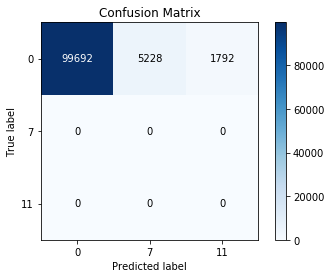

In [66]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    preds)

In [67]:
general_table = app_table
general_table['Result_decoder'] = preds

In [68]:
general_table.head()

,Base64DetectorDecoder,Base32DetectorDecoder,Base16DetectorDecoder,CSVDetectorParser,DeflateUnpacker,DSVDetectorParser,FormUrlencodeParser,GraphQLDetectorParser,GzipUnpacker,JSONPDetectorParser,JSONDetectorParser,JsonRPCDetectorParser,UrlParser,XMLDetectorParser,YAMLDetectorParser,File,Path,Real_decoder,Result_decoder
0,0.0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,/waf/decoder-detector/new_samples/youtube/trai...,"['headers', 'sec-fetch-site']",0,0
1,0.0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,/waf/decoder-detector/new_samples/youtube/trai...,"['headers', 'x-youtube-client-version']",0,0
2,0.0,1,0,1,0,1,1,0,0,0,0,0,1,0,1,/waf/decoder-detector/new_samples/youtube/trai...,"['body', 'context', 'client', 'hl']",0,0
3,1.0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,/waf/decoder-detector/new_samples/youtube/trai...,"['headers', 'x-goog-visitor-id']",0,0
5,0.0,0,1,1,0,1,1,0,0,0,1,0,1,0,1,/waf/decoder-detector/new_samples/youtube/trai...,"['body', 'events', '0', 'context', 'lastActivi...",0,0


In [69]:
general_table['Path'].unique()

array(["['headers', 'sec-fetch-site']",
       "['headers', 'x-youtube-client-version']",
       "['body', 'context', 'client', 'hl']", ...,
       "['body', 'events', '95', 'visualElementShown', 've', 'veCounter']",
       "['body', 'events', '23', 'latencyActionBaselined', 'clientActionNonce']",
       "['body', 'events', '121', 'visualElementAttached', 'childVes', '0', 'trackingParams']"],
      dtype=object)

In [70]:
DECODER_DICT = {}
for path in general_table['Path'].unique():
    current_table = general_table.loc[general_table['Path'] == path]
    most_prob_decoder = 0
    current_dict = {}
    for idx, row in current_table.iterrows():
        #print(row)
        if row['Result_decoder'] not in current_dict.keys():
            current_dict[row['Result_decoder']] = 1
        else:
            current_dict[row['Result_decoder']] += 1
    list_d = list(current_dict.items())
    list_d.sort(key=lambda i: i[1])
    most_prob_decoder = list_d[-1][0]
    #print(path, ':', list_d, most_prob_decoder)
    if most_prob_decoder != 0:
        DECODER_DICT[str(path)] = most_prob_decoder

In [71]:
for key in DECODER_DICT.keys():
    for k in NAME_NUM.keys():
        if NAME_NUM[k] == DECODER_DICT[key]:
            DECODER_DICT[key] = k
            
    #print(key, DECODER_DICT[key])
    
print(DECODER_DICT)

{"['headers', 'x-youtube-ad-signals']": 'FormUrlencodeParser', "['url', 'path', '1']": 'FormUrlencodeParser', "['body', 'events', '0', 'foregroundHeartbeat', 'clientDocumentNonce']": 'FormUrlencodeParser', "['body', 'events', '0', 'foregroundHeartbeat', 'lastEventDeltaMs']": 'JSONDetectorParser', "['body', 'events', '102', 'latencyActionInfo', 'clientPlaybackNonce']": 'FormUrlencodeParser', "['body', 'events', '17', 'latencyActionBaselined', 'clientActionNonce']": 'FormUrlencodeParser', "['body', 'events', '62', 'latencyActionInfo', 'httpProtocol']": 'FormUrlencodeParser', "['body', 'events', '93', 'foregroundHeartbeat', 'clientDocumentNonce']": 'FormUrlencodeParser', "['body', 'events', '93', 'foregroundHeartbeat', 'firstActivityMs']": 'JSONDetectorParser', "['body', 'events', '6', 'visualElementAttached', 'parentVe', 'trackingParams']": 'FormUrlencodeParser', "['body', 'events', '48', 'visualElementHidden', 've', 'trackingParams']": 'FormUrlencodeParser', "['body', 'events', '37', 'v

In [72]:
with open(ABSPATH+'/new_conds/'+filename[filename.rfind('/')+1:], 'w') as stats_file:
            stats_file.write(str(DECODER_DICT))